In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
from skimage.metrics import structural_similarity as ssim
from skimage.transform import resize

# Compare two spectrograms and calculate similarity
def compare_spectrograms(spec1, spec2):
    similarity = ssim(spec1, spec2, data_range=spec2.max() - spec2.min())
    return similarity

def create_spectrogram(file_path, figsize=(8, 6), target_shape=(256, 256)):
    sampling_freq, audio = wavfile.read(file_path)

    # Generate and resize spectrogram
    _, _, spectrogram_data = spectrogram(audio, fs=sampling_freq, nperseg=256, noverlap=128)
    spectrogram_resized = resize(spectrogram_data, target_shape)

    plt.figure(figsize=figsize)

    plt.pcolormesh(np.arange(spectrogram_resized.shape[1]), np.arange(spectrogram_resized.shape[0]), 10 * np.log10(spectrogram_resized), cmap='rainbow', vmin=-150, vmax=100)
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.title('Spectrogram - ' + os.path.basename(file_path))  
    plt.colorbar(label='Intensity (dB)')
    plt.show()
    
    return spectrogram_resized

# Comparison between original audio and protected audio

Folder: English


C:\Users\shid0\AppData\Local\Temp\ipykernel_19568\1421239438.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(np.arange(spectrogram_resized.shape[1]), np.arange(spectrogram_resized.shape[0]), 10 * np.log10(spectrogram_resized), cmap='rainbow', vmin=-150, vmax=100)


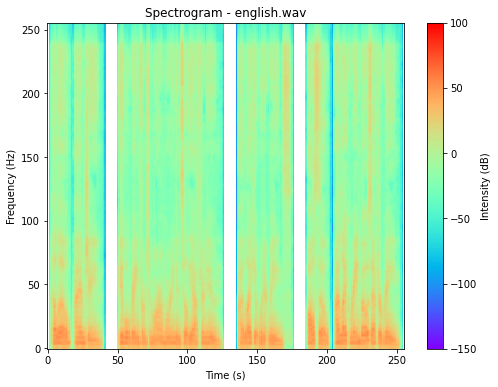

Comparing spectrogram for: ./Language/english/orig/english_protected.wav


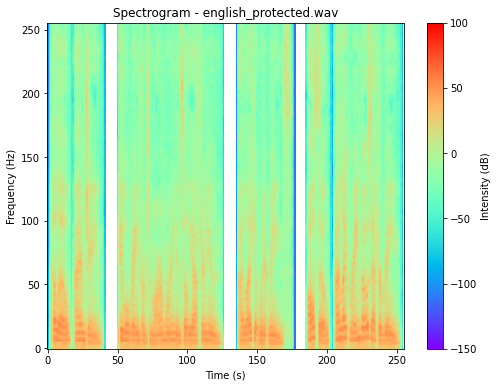

Similarity: 0.9479327278668918
Folder: Korean


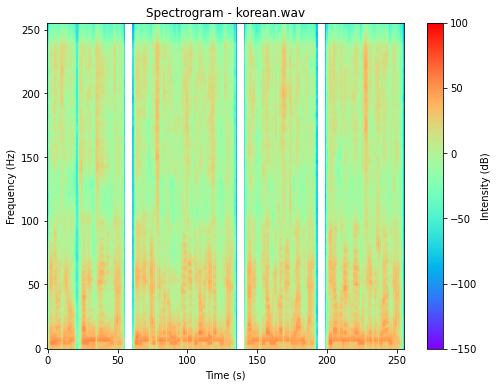

Comparing spectrogram for: ./Language/korean/orig/korean_protected.wav


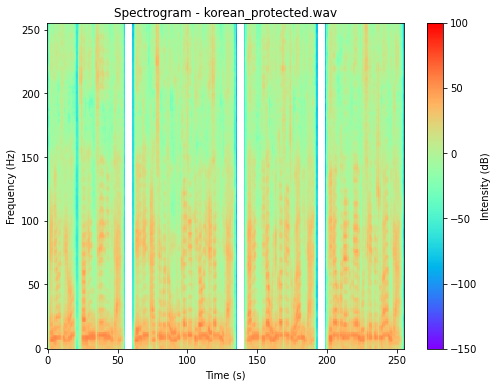

Similarity: 0.9464554967889255
Folder: Spanish


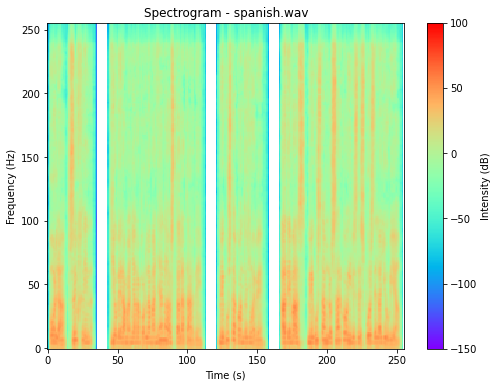

Comparing spectrogram for: ./Language/spanish/orig/spanish_protected.wav


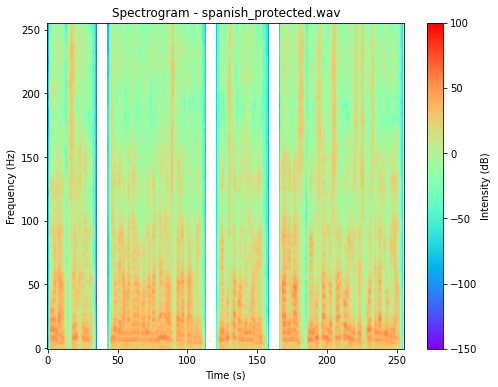

Similarity: 0.9300853175878838


In [9]:
folders = ['English', 'Korean', 'Spanish']
language = ['english', 'korean', 'spanish']

counter = 0
for folder in folders:
    print("Folder:", folder)
    folder_path = os.path.join('./Language', folder, 'orig')  
    
    reference_file = f'{folder.lower()}.wav'  
    reference_spec = create_spectrogram(os.path.join(folder_path, reference_file))
        
    file_path=f'./Language/{language[counter]}/orig/{language[counter]}_protected.wav'

    print("Comparing spectrogram for:", file_path)
    current_spec = create_spectrogram(file_path)
    similarity = compare_spectrograms(reference_spec, current_spec)
    print("Similarity:", similarity)
    counter += 1


# Comparison between generated audios 
### Generated with original audio and generated with protected audio

Folder: English


C:\Users\shid0\AppData\Local\Temp\ipykernel_19568\1421239438.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(np.arange(spectrogram_resized.shape[1]), np.arange(spectrogram_resized.shape[0]), 10 * np.log10(spectrogram_resized), cmap='rainbow', vmin=-150, vmax=100)


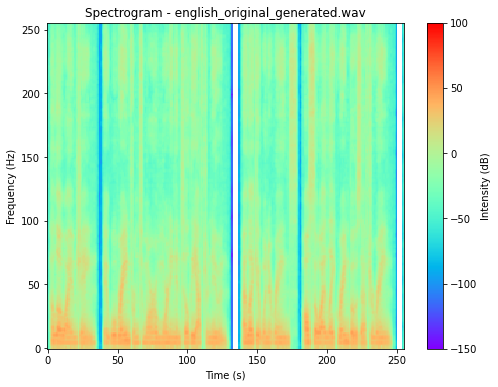

Comparing spectrogram for: ./Language/english/generated/english_protected_generated.wav


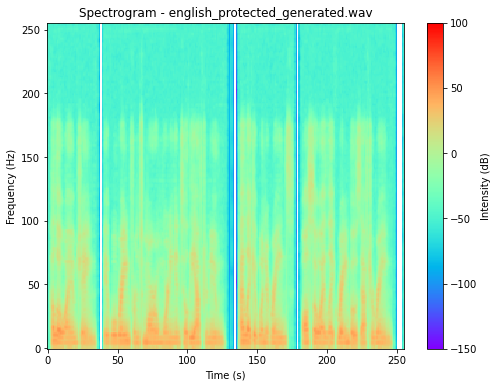

Similarity: 0.9840554027329758
Folder: Korean


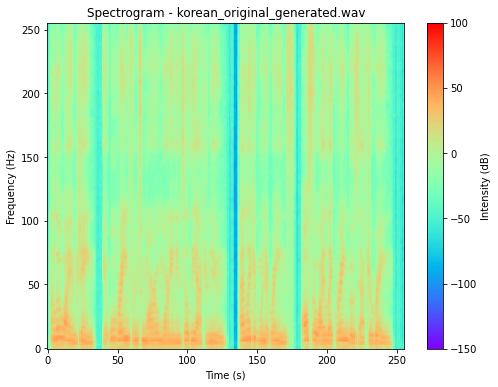

Comparing spectrogram for: ./Language/korean/generated/korean_protected_generated.wav


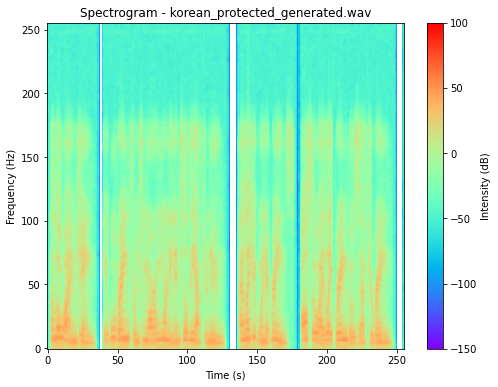

Similarity: 0.9776612228202224
Folder: Spanish


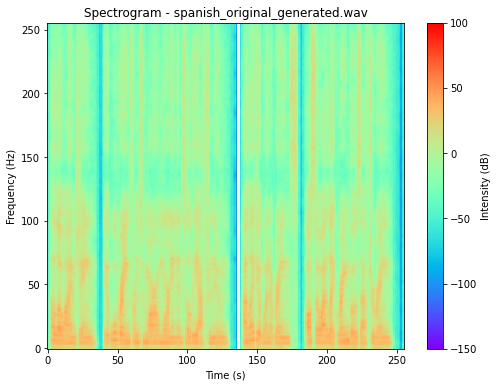

Comparing spectrogram for: ./Language/spanish/generated/spanish_protected_generated.wav


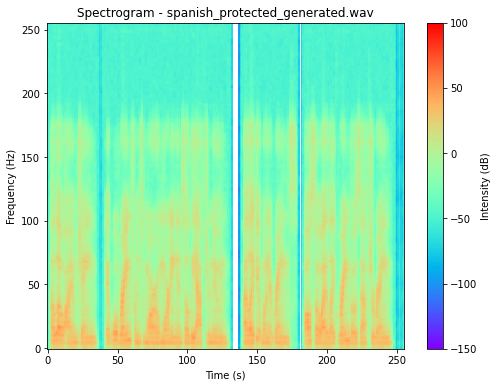

Similarity: 0.9796190095651894


In [10]:
folders = ['English', 'Korean', 'Spanish']
language = ['english', 'korean', 'spanish']

counter = 0
for folder in folders:
    print("Folder:", folder)
    folder_path = os.path.join('./Language', folder, 'generated')  
    
    reference_file = f'{folder.lower()}_original_generated.wav' 
    reference_spec = create_spectrogram(os.path.join(folder_path, reference_file))
    file_path=f'./Language/{language[counter]}/generated/{language[counter]}_protected_generated.wav'

    print("Comparing spectrogram for:", file_path)
    current_spec = create_spectrogram(file_path)
    similarity = compare_spectrograms(reference_spec, current_spec)
    print("Similarity:", similarity)
    counter += 1


# Comparison between original audio and generated audio with protected audio

Folder: English


C:\Users\shid0\AppData\Local\Temp\ipykernel_19568\1421239438.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(np.arange(spectrogram_resized.shape[1]), np.arange(spectrogram_resized.shape[0]), 10 * np.log10(spectrogram_resized), cmap='rainbow', vmin=-150, vmax=100)


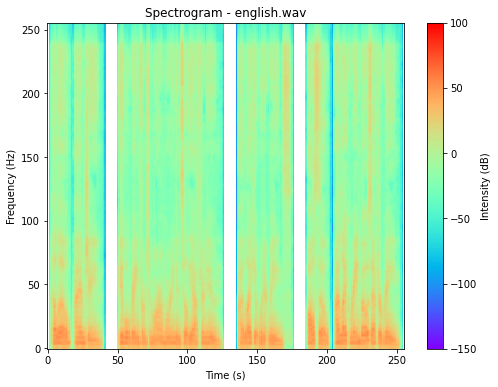

Comparing spectrogram for: ./Language/english/generated/english_protected_generated.wav


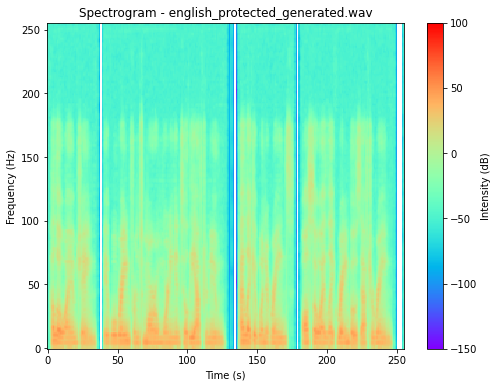

Similarity: 0.9410732869313969
Folder: Korean


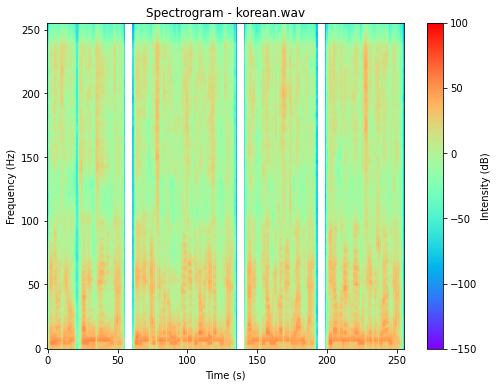

Comparing spectrogram for: ./Language/korean/generated/korean_protected_generated.wav


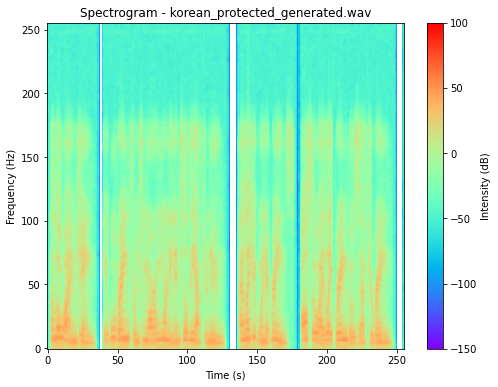

Similarity: 0.8682633841566336
Folder: Spanish


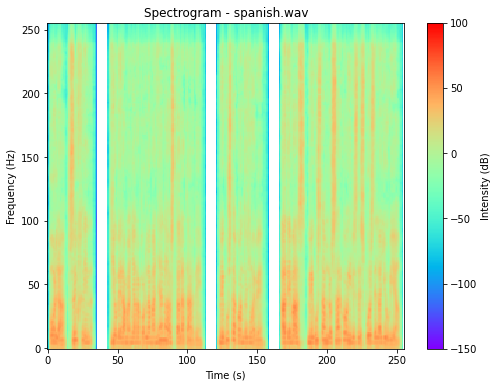

Comparing spectrogram for: ./Language/spanish/generated/spanish_protected_generated.wav


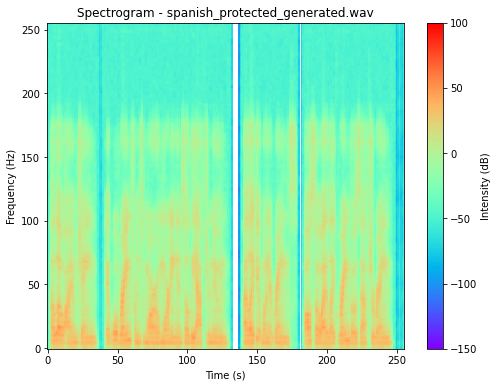

Similarity: 0.8885075012770496


In [11]:
folders = ['English', 'Korean', 'Spanish']
language = ['english', 'korean', 'spanish']

counter = 0
for folder in folders:
    print("Folder:", folder)
    folder_path = os.path.join('./Language', folder, 'orig')  
    
    reference_file = f'{folder.lower()}.wav'  
    reference_spec = create_spectrogram(os.path.join(folder_path, reference_file))   
    file_path=f'./Language/{language[counter]}/generated/{language[counter]}_protected_generated.wav'

    print("Comparing spectrogram for:", file_path)
    current_spec = create_spectrogram(file_path)
    similarity = compare_spectrograms(reference_spec, current_spec)
    print("Similarity:", similarity)
    counter += 1
